# Training

## Importing data

The dataset is available on https://github.com/rois-codh/kmnist.

In [ ]:
!wget http://codh.rois.ac.jp/kmnist/dataset/k49/k49-train-imgs.npz
!wget http://codh.rois.ac.jp/kmnist/dataset/k49/k49-train-labels.npz
!wget http://codh.rois.ac.jp/kmnist/dataset/k49/k49-test-imgs.npz
!wget http://codh.rois.ac.jp/kmnist/dataset/k49/k49-test-labels.npz

--2021-12-19 06:35:23--  http://codh.rois.ac.jp/kmnist/dataset/k49/k49-train-imgs.npz
Resolving codh.rois.ac.jp (codh.rois.ac.jp)... 136.187.88.58
Connecting to codh.rois.ac.jp (codh.rois.ac.jp)|136.187.88.58|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 66117696 (63M)
Saving to: ‘k49-train-imgs.npz.1’

k49-train-imgs.npz. 100%[===================>]  63.05M  3.17MB/s    in 19s     

2021-12-19 06:35:43 (3.35 MB/s) - ‘k49-train-imgs.npz.1’ saved [66117696/66117696]

--2021-12-19 06:35:43--  http://codh.rois.ac.jp/kmnist/dataset/k49/k49-train-labels.npz
Resolving codh.rois.ac.jp (codh.rois.ac.jp)... 136.187.88.58
Connecting to codh.rois.ac.jp (codh.rois.ac.jp)|136.187.88.58|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 164485 (161K)
Saving to: ‘k49-train-labels.npz.1’

k49-train-labels.np 100%[===================>] 160.63K   239KB/s    in 0.7s    

2021-12-19 06:35:44 (239 KB/s) - ‘k49-train-labels.npz.1’ saved [164485/164485]

--2021

In [ ]:
from tensorflow import keras
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras import backend as K

# Load the data into numpy array
train_images = np.load("k49-train-imgs.npz")['arr_0']
train_labels = np.load("k49-train-labels.npz")['arr_0']
test_images = np.load("k49-test-imgs.npz")['arr_0']
test_labels = np.load("k49-test-labels.npz")['arr_0']

# Resize the data into the shape that the model accepts
if K.image_data_format() == "channels_first":
  train_images = train_images.reshape(train_images.shape[0], 1,28,28)
  test_images = test_images.reshape(test_images.shape[0], 1,28,28)
  shape = (1,28,28)
else:
  train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)
  test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)
  shape = (28,28,1)

# Normalize the image data
train_images = train_images/255.0
test_images = test_images / 255.0

# allow 15 degree rotation and zoom range of 0.2 for the images
datagen = ImageDataGenerator(rotation_range=15,zoom_range=0.2)
datagen.fit(train_images)

## Simple CNN
The following convolutional neural network is built by referring to the following link:
###### https://github.com/Nippon2019/Handwritten-Japanese-Recognition/blob/master/Kuzushiji/kuzushiji_CNN.py

In [ ]:
model = keras.Sequential([
	keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=shape),
	keras.layers.MaxPooling2D(2,2),
	keras.layers.Conv2D(64, (3,3), activation='relu'),
	keras.layers.MaxPooling2D(2,2),
  keras.layers.Flatten(),
  keras.layers.Dropout(0.5),
  keras.layers.Dense(512, activation='relu'),
  keras.layers.Dense(49, activation="softmax")
])

model.summary()

model.compile(optimizer='adam', loss="sparse_categorical_crossentropy", metrics=['accuracy'])

cnn_hist = model.fit_generator(datagen.flow(train_images,train_labels,shuffle=True),
                               validation_data=(test_images,test_labels),
                               epochs=40,
                               callbacks = [keras.callbacks.EarlyStopping(patience=8,verbose=1,restore_best_weights=True),
                                            keras.callbacks.ReduceLROnPlateau(factor=0.5,patience=3,verbose=1)])


model.save("CNN.h5")

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/40
7262/7262 [==============================] - 84s 10ms/step - loss: 0.6724 - accuracy: 0.8138 - val_loss: 0.4219 - val_accuracy: 0.8884 - lr: 0.0010
Epoch 2/40
7262/7262 [==============================] - 70s 10ms/step - loss: 0.3622 - accuracy: 0.8963 - val_loss: 0.3358 - val_accuracy: 0.9122 - lr: 0.0010
Epoch 3/40
7262/7262 [==============================] - 67s 9ms/step - loss: 0.3041 - accuracy: 0.9124 - val_loss: 0.3029 - val_accuracy: 0.9219 - lr: 0.0010
Epoch 4/40
7262/7262 [==============================] - 67s 9ms/step - loss: 0.2723 - accuracy: 0.9209 - val_loss: 0.2859 - val_accuracy: 0.9284 - lr: 0.0010
Epoch 5/40
7262/7262 [==============================] - 68s 9ms/step - loss: 0.2530 - accuracy: 0.9264 - val_loss: 0.2675 - val_accuracy: 0.9337 - lr: 0.0010
Epoch 6/40
7262/7262 [==============================] - 68s 9ms/step - loss: 0.2416 - accuracy: 0.9297 - val_loss: 0.2703 - val_accuracy: 0.9350 - lr: 0.0010
Epoch 7/40
7262/7262 [============================

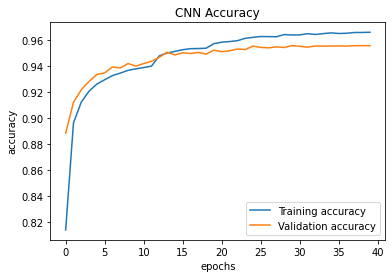

In [ ]:
from matplotlib import pyplot as plt

tr_accuracy = cnn_hist.history['accuracy']
val_accuracy = cnn_hist.history['val_accuracy']

plt.plot(tr_accuracy);
plt.plot(val_accuracy);
plt.title('CNN Accuracy')
plt.xlabel('epochs');
plt.ylabel('accuracy');
plt.legend(['Training accuracy', 'Validation accuracy']);

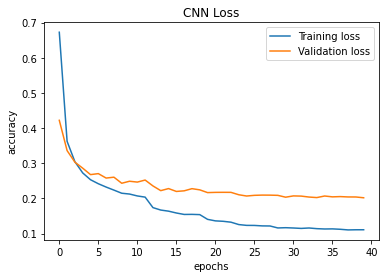

In [ ]:
tr_loss = cnn_hist.history['loss']
val_loss = cnn_hist.history['val_loss']

plt.plot(tr_loss)
plt.plot(val_loss)
plt.title('CNN Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['Training loss', 'Validation loss']);

## AlexNet (Working)
#####http://dangminhthang.com/computer-vision/character-recognition-using-alexnet/

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *

#Instantiation
AlexNet = Sequential()

#1st Convolutional Layer
AlexNet.add(Conv2D(filters=96, input_shape=(28,28,1), kernel_size=(11,11), strides=(4,4), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

#2nd Convolutional Layer
AlexNet.add(Conv2D(filters=256, kernel_size=(5, 5), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

#3rd Convolutional Layer
AlexNet.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))

#4th Convolutional Layer
AlexNet.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))

#5th Convolutional Layer
AlexNet.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

#Passing it to a Fully Connected layer
AlexNet.add(Flatten())
# 1st Fully Connected Layer
AlexNet.add(Dense(4096, input_shape=(32,32,3,)))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
# Add Dropout to prevent overfitting
AlexNet.add(Dropout(0.4))

#2nd Fully Connected Layer
AlexNet.add(Dense(4096))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
#Add Dropout
AlexNet.add(Dropout(0.4))

#3rd Fully Connected Layer
AlexNet.add(Dense(1000))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
#Add Dropout
AlexNet.add(Dropout(0.4))

#Output Layer
AlexNet.add(Dense(49))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('softmax'))

#Model Summary
AlexNet.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 7, 7, 96)          11712     
                                                                 
 batch_normalization (BatchN  (None, 7, 7, 96)         384       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 7, 7, 96)          0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 96)         0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 4, 4, 256)         614656    
                                                                 
 batch_normalization_1 (Batc  (None, 4, 4, 256)       

In [ ]:
AlexNet.compile(loss = keras.losses.sparse_categorical_crossentropy, optimizer= 'adam', metrics=['accuracy'])

from keras.callbacks import ReduceLROnPlateau
lrr= ReduceLROnPlateau(   monitor='val_accuracy',   factor=.01,   patience=3,  min_lr=1e-5) 

batch_size= 64
epochs=40
learn_rate=.001



In [ ]:
alex_hist = AlexNet.fit(datagen.flow(train_images,train_labels,shuffle=True),
                      epochs=epochs,
                      validation_data=(test_images,test_labels),
                      callbacks = [lrr], 
                      verbose=1)

AlexNet.save("AlexNet.h5")

Epoch 1/40
7262/7262 [==============================] - 129s 18ms/step - loss: 1.3992 - accuracy: 0.6303 - val_loss: 1.6747 - val_accuracy: 0.5642 - lr: 0.0010
Epoch 2/40
7262/7262 [==============================] - 122s 17ms/step - loss: 0.8260 - accuracy: 0.7832 - val_loss: 1.2458 - val_accuracy: 0.6753 - lr: 0.0010
Epoch 3/40
7262/7262 [==============================] - 127s 17ms/step - loss: 0.6558 - accuracy: 0.8272 - val_loss: 0.9829 - val_accuracy: 0.7384 - lr: 0.0010
Epoch 4/40
7262/7262 [==============================] - 128s 18ms/step - loss: 0.5569 - accuracy: 0.8527 - val_loss: 0.6483 - val_accuracy: 0.8229 - lr: 0.0010
Epoch 5/40
7262/7262 [==============================] - 112s 15ms/step - loss: 0.4968 - accuracy: 0.8682 - val_loss: 0.7273 - val_accuracy: 0.8129 - lr: 0.0010
Epoch 6/40
7262/7262 [==============================] - 103s 14ms/step - loss: 0.4508 - accuracy: 0.8799 - val_loss: 0.6025 - val_accuracy: 0.8445 - lr: 0.0010
Epoch 7/40
7262/7262 [==================

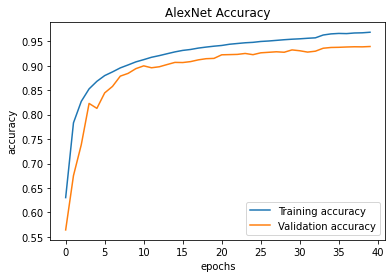

In [ ]:
tr_accuracy = alex_hist.history['accuracy']
val_accuracy = alex_hist.history['val_accuracy']

plt.plot(tr_accuracy);
plt.plot(val_accuracy);
plt.title('AlexNet Accuracy')
plt.xlabel('epochs');
plt.ylabel('accuracy');
plt.legend(['Training accuracy', 'Validation accuracy']);

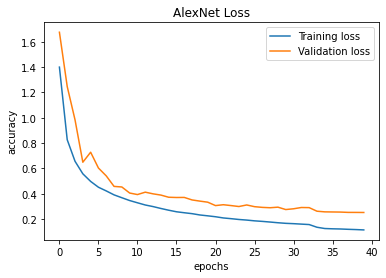

In [ ]:
tr_loss = alex_hist.history['loss']
val_loss = alex_hist.history['val_loss']

plt.plot(tr_loss);
plt.plot(val_loss);
plt.title('AlexNet Loss')
plt.xlabel('epochs');
plt.ylabel('loss');
plt.legend(['Training loss', 'Validation loss']);

## VGGNet (Working)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *

VGGNet = Sequential()

VGGNet.add(Conv2D(input_shape=shape, filters=64, kernel_size=(3,3), padding="same", name="conv64_1"))
VGGNet.add(BatchNormalization())
VGGNet.add(Activation('relu'))
VGGNet.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", name="conv64_2"))
VGGNet.add(BatchNormalization())
VGGNet.add(Activation('relu'))
VGGNet.add(MaxPool2D(pool_size=(2,2), strides=(2,2), name="maxpool_1"))

VGGNet.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", name="conv128_1"))
VGGNet.add(BatchNormalization())
VGGNet.add(Activation('relu'))
VGGNet.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", name="conv128_2"))
VGGNet.add(BatchNormalization())
VGGNet.add(Activation('relu'))
VGGNet.add(MaxPool2D(pool_size=(2,2),strides=(2,2), name="maxpool_2"))

VGGNet.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", name="conv256_1"))
VGGNet.add(BatchNormalization())
VGGNet.add(Activation('relu'))
VGGNet.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", name="conv256_2"))
VGGNet.add(BatchNormalization())
VGGNet.add(Activation('relu'))
VGGNet.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", name="conv256_3"))
VGGNet.add(BatchNormalization())
VGGNet.add(Activation('relu'))
VGGNet.add(MaxPool2D(pool_size=(2,2),strides=(2,2), name="maxpool_3"))

VGGNet.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", name="conv512_1"))
VGGNet.add(BatchNormalization())
VGGNet.add(Activation('relu'))
VGGNet.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", name="conv512_2"))
VGGNet.add(BatchNormalization())
VGGNet.add(Activation('relu'))
VGGNet.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", name="conv512_3"))
VGGNet.add(BatchNormalization())
VGGNet.add(Activation('relu'))
VGGNet.add(MaxPool2D(pool_size=(2,2),strides=(2,2), name="maxpool_4"))

VGGNet.add(Flatten(name="flatten"))
VGGNet.add(Dense(units=2048, activation="relu", name="dense_1"))
VGGNet.add( Dropout(0.5, name='dropout_1'))
VGGNet.add(Dense(units=2048,activation="relu", name="dense_2"))
VGGNet.add( Dropout(0.5, name='dropout_2'))
VGGNet.add(Dense(units=1024,activation="relu", name="dense_3"))
VGGNet.add( Dropout(0.5, name='dropout_3'))
VGGNet.add(Dense(units=49, activation="softmax", name="softmax"))

In [ ]:
VGGNet.compile( optimizer= 'adam', loss=keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])
VGGNet.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv64_1 (Conv2D)           (None, 28, 28, 64)        640       
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 64)       256       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 28, 28, 64)        0         
                                                                 
 conv64_2 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 batch_normalization_1 (Batc  (None, 28, 28, 64)       256       
 hNormalization)                                                 
                                                                 
 activation_1 (Activation)   (None, 28, 28, 64)        0

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

checkpoint = ModelCheckpoint("vgg16_1.h5", 
                             monitor='val_acc', 
                             verbose=1, 
                             save_best_only=True, 
                             save_weights_only=False, 
                             mode='auto', 
                             period=1)

early = EarlyStopping(monitor='val_acc', 
                      min_delta=0, 
                      patience=20, 
                      verbose=1, 
                      mode='auto')

In [ ]:
vgg_hist = VGGNet.fit(datagen.flow(train_images,train_labels,shuffle=True),
           validation_data=(test_images,test_labels), 
           epochs=40,
           callbacks=[checkpoint,early])

VGGNet.save("VGGNet.h5")

Epoch 1/40
7262/7262 [==============================] - 138s 19ms/step - loss: 1.1190 - accuracy: 0.7070 - val_loss: 0.7473 - val_accuracy: 0.8201
Epoch 2/40
7262/7262 [==============================] - 138s 19ms/step - loss: 0.4090 - accuracy: 0.9040 - val_loss: 0.4201 - val_accuracy: 0.9021
Epoch 3/40
7262/7262 [==============================] - 133s 18ms/step - loss: 0.3177 - accuracy: 0.9277 - val_loss: 0.3808 - val_accuracy: 0.9106
Epoch 4/40
7262/7262 [==============================] - 137s 19ms/step - loss: 0.2730 - accuracy: 0.9387 - val_loss: 0.3686 - val_accuracy: 0.9162
Epoch 5/40
7262/7262 [==============================] - 137s 19ms/step - loss: 0.2508 - accuracy: 0.9446 - val_loss: 0.2835 - val_accuracy: 0.9349
Epoch 6/40
7262/7262 [==============================] - 137s 19ms/step - loss: 0.2330 - accuracy: 0.9487 - val_loss: 0.2625 - val_accuracy: 0.9445
Epoch 7/40
7262/7262 [==============================] - 133s 18ms/step - loss: 0.2212 - accuracy: 0.9519 - val_loss: 0

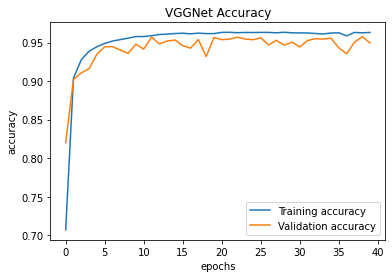

In [ ]:
from matplotlib import pyplot as plt

tr_accuracy = vgg_hist.history['accuracy']
val_accuracy = vgg_hist.history['val_accuracy']

plt.plot(tr_accuracy)
plt.plot(val_accuracy)
plt.title('VGGNet Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['Training accuracy', 'Validation accuracy']);

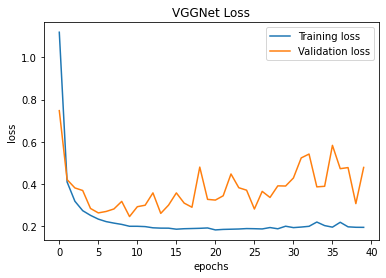

In [ ]:
tr_loss = vgg_hist.history['loss']
val_loss = vgg_hist.history['val_loss']

plt.plot(tr_loss)
plt.plot(val_loss)
plt.title('VGGNet Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['Training loss', 'Validation loss']);

#Importing self-written characters for recognition


In [ ]:
'''
The following packages are imported for loading and preprocessing images, 
make prediciton from the models produced, and send the prediction result 
to DeepL API for translation.
'''
import os
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import requests
import json

In [ ]:
# Import the saved models for prediction

cnn = tf.keras.models.load_model("CNN.h5")
alexnet = tf.keras.models.load_model("AlexNet.h5")
vgg = tf.keras.models.load_model("VGGNet.h5")

In [ ]:
# The mapping between classes and characters can be refered to
# http://codh.rois.ac.jp/kmnist/dataset/k49/k49_classmap.csv

hiragana_dict = {0:"あ", 1:"い", 2:"う", 3:"え", 4:"お",
                 5:"か", 6:"き", 7:"く", 8:"け", 9:"こ",
                 10:"さ", 11:"し", 12:"す", 13:"せ", 14:"そ",
                 15:"た", 16:"ち", 17:"つ", 18:"て", 19:"と",
                 20:"な", 21:"に", 22:"ぬ", 23:"ね", 24:"の",
                 25:"は", 26:"ひ", 27:"ふ", 28:"へ", 29:"ほ",
                 30:"ま", 31:"み", 32:"む", 33:"め", 34:"も",
                 35:"や", 36:"ゆ", 37:"よ", 
                 38:"ら", 39:"り", 40:"る", 41:"れ", 42:"ろ", 
                 43:"わ", 44:"ゐ", 45:"ゑ", 46:"を", 
                 47:"ん", 48:"ゝ"}

In [ ]:
# Helper function to send translation request to DeepL API
# The response from DeepL is returned

# Documentation for DeepL API can be found here: https://www.deepl.com/en/docs-api/

DeepL_auth_key = "XXXXXXXXXXXXXXXXXXXXXXXX"

def DeepL_translation(JP_string):
    r = requests.post(url="https://api-free.deepl.com/v2/translate",
                        data={
                        "text" : JP_string,
                        "source_lang" : "JA",
                        "target_lang" : "EN-US",
                        "auth_key" : DeepL_auth_key,
                        })
    return r

In [ ]:
# Helper function to make prediciton for each model, and 
# print translation from DeepL API

def predict_and_translate(jp_string):
    # CNN Model Prediction
    cnn_prediction = []
    for x in range(l):
        pred = cnn.predict(jp_string[x])
        cnn_prediction.append(hiragana_dict[np.argmax(pred)])
    cnn_prediction = ''.join(cnn_prediction)

    # Print the prediction of each characters
    print("CNN:", cnn_prediction)
    # Send request to DeepL API and print translation
    response = DeepL_translation(cnn_prediction)
    print("Translation:", response.json()["translations"][0]["text"], "\r\n")

    # AlexNet Model Prediciton
    alex_prediction = []
    for x in range(l):
        pred = alexnet.predict(jp_string[x])
        alex_prediction.append(hiragana_dict[np.argmax(pred)])
    alex_prediction = ''.join(alex_prediction)
    print("AlexNet:", alex_prediction)
    response = DeepL_translation(alex_prediction)
    print("Translation:", response.json()["translations"][0]["text"], "\r\n")

    vgg_prediction = []
    for x in range(l):
        pred = vgg.predict(jp_string[x])
        vgg_prediction.append(hiragana_dict[np.argmax(pred)])
    vgg_prediction = ''.join(vgg_prediction)
    print("VGGNet:", vgg_prediction)
    response = DeepL_translation(alex_prediction)
    print("Translation:", response.json()["translations"][0]["text"], "\r\n")

## Test cases:
The following test cases are created (with kanji (if available) and corresponding meaning(s)):

1.   おやすみなさい (Good night)
2.   おはよう (Good morning)
3.   わかります (分かります, Understood)
4.   お母さん (お母さん, Mother)
5.   よこはまにいきたい (横浜に行きたい, (I) want to go to Yokohama)
6.   きょうてんきはよい (今日天気は良い, Weather is good today)
7.   えき (駅, station; 液, fluid)
8.   よる (夜, night ; 寄る, lean on/against)
9.   そと (外, outside)

Since our algorithm does not include function to identify a image of a group of hiragana, the characters are taken out individually for classification.

### Test Case 1: おやすみなさい

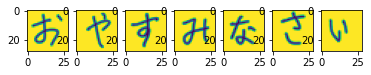

In [ ]:
# Load the individual handwritting characters into a list
jp_string = []
jp_string.append(Image.open("1_1_o.png").convert("L").resize((28,28)))
jp_string.append(Image.open("1_2_ya.png").convert("L").resize((28,28)))
jp_string.append(Image.open("1_3_su.png").convert("L").resize((28,28)))
jp_string.append(Image.open("1_4_mi.png").convert("L").resize((28,28)))
jp_string.append(Image.open("1_5_na.png").convert("L").resize((28,28)))
jp_string.append(Image.open("1_6_sa.png").convert("L").resize((28,28)))
jp_string.append(Image.open("1_7_i.png").convert("L").resize((28,28)))
l = len(jp_string)

for x in range(l):
    plt.subplot(1,l,x+1)
    plt.imshow(jp_string[x])

plt.show()

In [ ]:
# Data preprocessing
for x in range(l):
    jp_string[x] = np.array(jp_string[x])
    jp_string[x] = 255 - jp_string[x]
    jp_string[x] = jp_string[x] / 255
    jp_string[x] = jp_string[x].reshape((1,28,28,1))

predict_and_translate(jp_string)

CNN: あとすみなさけ
Translation: finishing touches 

AlexNet: あやすのやさい
Translation: vegetables not high in beta-carotene 

VGGNet: あやすみるさい
Translation: vegetables not high in beta-carotene 



### Test Case 2: おはよう

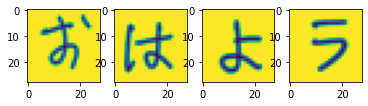

In [ ]:
jp_string = []
jp_string.append(Image.open("2_1_o.png").convert("L").resize((28,28)))
jp_string.append(Image.open("2_2_ha.png").convert("L").resize((28,28)))
jp_string.append(Image.open("2_3_yo.png").convert("L").resize((28,28)))
jp_string.append(Image.open("2_4_u.png").convert("L").resize((28,28)))
l = len(jp_string)

for x in range(l):
    plt.subplot(1,l,x+1)
    plt.imshow(jp_string[x])

plt.show()

In [ ]:
for x in range(l):
    jp_string[x] = np.array(jp_string[x])
    jp_string[x] = 255 - jp_string[x]
    jp_string[x] = jp_string[x] / 255
    jp_string[x] = jp_string[x].reshape((1,28,28,1))

predict_and_translate(jp_string)

CNN: あのよこ
Translation: that way (direction distant from the speaker, close to the listener) 

AlexNet: なはよち
Translation: seven days and nights 

VGGNet: のけよけ
Translation: seven days and nights 



### Test Case 3: わかります

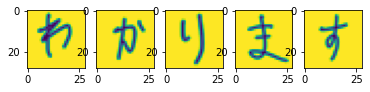

In [ ]:
jp_string = []
jp_string.append(Image.open("3_1_wa.png").convert("L").resize((28,28)))
jp_string.append(Image.open("3_2_ka.png").convert("L").resize((28,28)))
jp_string.append(Image.open("3_3_ri.png").convert("L").resize((28,28)))
jp_string.append(Image.open("3_4_ma.png").convert("L").resize((28,28)))
jp_string.append(Image.open("3_5_su.png").convert("L").resize((28,28)))
l = len(jp_string)

for x in range(l):
    plt.subplot(1,l,x+1)
    plt.imshow(jp_string[x])

plt.show()

In [ ]:
for x in range(l):
    jp_string[x] = np.array(jp_string[x])
    jp_string[x] = 255 - jp_string[x]
    jp_string[x] = jp_string[x] / 255
    jp_string[x] = jp_string[x].reshape((1,28,28,1))

predict_and_translate(jp_string)

CNN: あせります
Translation: I'm in a hurry. 

AlexNet: わもります
Translation: babysitter 

VGGNet: あつります
Translation: babysitter 



### Test Case 4: おかあさん

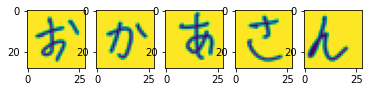

In [ ]:
jp_string = []
jp_string.append(Image.open("4_1_o.png").convert("L").resize((28,28)))
jp_string.append(Image.open("4_2_ka.png").convert("L").resize((28,28)))
jp_string.append(Image.open("4_3_a.png").convert("L").resize((28,28)))
jp_string.append(Image.open("4_4_sa.png").convert("L").resize((28,28)))
jp_string.append(Image.open("4_5_n.png").convert("L").resize((28,28)))
l = len(jp_string)

for x in range(l):
    plt.subplot(1,l,x+1)
    plt.imshow(jp_string[x])

plt.show()

In [ ]:
for x in range(l):
    jp_string[x] = np.array(jp_string[x])
    jp_string[x] = 255 - jp_string[x]
    jp_string[x] = jp_string[x] / 255
    jp_string[x] = jp_string[x].reshape((1,28,28,1))

predict_and_translate(jp_string)

CNN: おかしさん
Translation: sweetsop (fruit) 

AlexNet: おほもとん
Translation: your husband 

VGGNet: おかあさん
Translation: your husband 



### Test Case 5: よこはまにいきたい

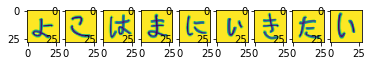

In [ ]:
jp_string = []
jp_string.append(Image.open("5_1_yo.png").convert("L").resize((28,28)))
jp_string.append(Image.open("5_2_ko.png").convert("L").resize((28,28)))
jp_string.append(Image.open("5_3_ha.png").convert("L").resize((28,28)))
jp_string.append(Image.open("5_4_ma.png").convert("L").resize((28,28)))
jp_string.append(Image.open("5_5_ni.png").convert("L").resize((28,28)))
jp_string.append(Image.open("5_6_i.png").convert("L").resize((28,28)))
jp_string.append(Image.open("5_7_ki.png").convert("L").resize((28,28)))
jp_string.append(Image.open("5_8_ta.png").convert("L").resize((28,28)))
jp_string.append(Image.open("5_9_i.png").convert("L").resize((28,28)))
l = len(jp_string)

for x in range(l):
    plt.subplot(1,l,x+1)
    plt.imshow(jp_string[x])

plt.show()

In [ ]:
for x in range(l):
    jp_string[x] = np.array(jp_string[x])
    jp_string[x] = 255 - jp_string[x]
    jp_string[x] = jp_string[x] / 255
    jp_string[x] = jp_string[x].reshape((1,28,28,1))

predict_and_translate(jp_string)

CNN: よわはよにむきたひ
Translation: Don't waste your breath! 

AlexNet: よわつににひきめい
Translation: Two words, two words... 

VGGNet: たもままけひきたい
Translation: Two words, two words... 



### Test Case 6: きょうてんきはよい

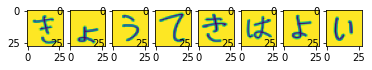

In [ ]:
jp_string = []
jp_string.append(Image.open("6_1_ki.png").convert("L").resize((28,28)))
jp_string.append(Image.open("6_2_xyo.png").convert("L").resize((28,28)))
jp_string.append(Image.open("6_3_u.png").convert("L").resize((28,28)))
jp_string.append(Image.open("6_4_te.png").convert("L").resize((28,28)))
jp_string.append(Image.open("6_5_ki.png").convert("L").resize((28,28)))
jp_string.append(Image.open("6_6_ha.png").convert("L").resize((28,28)))
jp_string.append(Image.open("6_7_yo.png").convert("L").resize((28,28)))
jp_string.append(Image.open("6_8_i.png").convert("L").resize((28,28)))
l = len(jp_string)

for x in range(l):
    plt.subplot(1,l,x+1)
    plt.imshow(jp_string[x])

plt.show()

In [ ]:
for x in range(l):
    jp_string[x] = np.array(jp_string[x])
    jp_string[x] = 255 - jp_string[x]
    jp_string[x] = jp_string[x] / 255
    jp_string[x] = jp_string[x].reshape((1,28,28,1))

predict_and_translate(jp_string)

CNN: せたうてきのよひ
Translation: the cost of living 

AlexNet: れたかてせすよひ
Translation: expenses incurred in the past 

VGGNet: せけけてきまよい
Translation: expenses incurred in the past 



### Test Case 7: えき

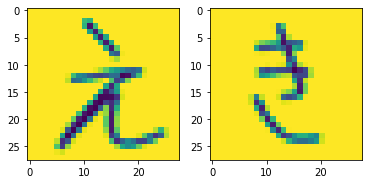

In [ ]:
jp_string = []
jp_string.append(Image.open("7_1_e.png").convert("L").resize((28,28)))
jp_string.append(Image.open("7_2_ki.png").convert("L").resize((28,28)))
l = len(jp_string)

for x in range(l):
    plt.subplot(1,l,x+1)
    plt.imshow(jp_string[x])

plt.show()

In [ ]:
for x in range(l):
    jp_string[x] = np.array(jp_string[x])
    jp_string[x] = 255 - jp_string[x]
    jp_string[x] = jp_string[x] / 255
    jp_string[x] = jp_string[x].reshape((1,28,28,1))

predict_and_translate(jp_string)

CNN: えき
Translation: fluid 

AlexNet: えき
Translation: fluid 

VGGNet: えき
Translation: fluid 



### Test Case 8: よる

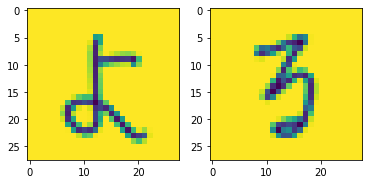

In [ ]:
jp_string = []
jp_string.append(Image.open("8_1_yo.png").convert("L").resize((28,28)))
jp_string.append(Image.open("8_2_ru.png").convert("L").resize((28,28)))
l = len(jp_string)

for x in range(l):
    plt.subplot(1,l,x+1)
    plt.imshow(jp_string[x])

plt.show()

In [ ]:
for x in range(l):
    jp_string[x] = np.array(jp_string[x])
    jp_string[x] = 255 - jp_string[x]
    jp_string[x] = jp_string[x] / 255
    jp_string[x] = jp_string[x].reshape((1,28,28,1))

predict_and_translate(jp_string)

CNN: よる
Translation: grow high (number, etc.) 

AlexNet: よる
Translation: grow high (number, etc.) 

VGGNet: よる
Translation: grow high (number, etc.) 



### Test Case 9: そと

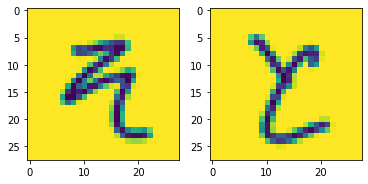

In [ ]:
jp_string = []
jp_string.append(Image.open("9_1_so.png").convert("L").resize((28,28)))
jp_string.append(Image.open("9_2_to.png").convert("L").resize((28,28)))
l = len(jp_string)

for x in range(l):
    plt.subplot(1,l,x+1)
    plt.imshow(jp_string[x])

plt.show()

In [ ]:
for x in range(l):
    jp_string[x] = np.array(jp_string[x])
    jp_string[x] = 255 - jp_string[x]
    jp_string[x] = jp_string[x] / 255
    jp_string[x] = jp_string[x].reshape((1,28,28,1))

predict_and_translate(jp_string)

CNN: もと
Translation: material 

AlexNet: もと
Translation: material 

VGGNet: そと
Translation: material 

